### Import das dependências

In [54]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Importar os datasets

In [55]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)


### Verificar qualidade dos dados
- Verificar valores null
- Verificar duplicados

In [56]:
# Verificar valores vazios
nulls = merged_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = merged_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())


Número de nulls:  nível_de_tensão                 0
ano                             0
mês                             0
energia_ativa_(kwh)             0
cpes_doméstico                  0
cpes_iluminação_pública         0
cpes_não_doméstico              0
cpes_outros                     0
cpes_mobilidade_eletrica_não    0
cpes_mobilidade_eletrica_sim    0
dtype: int64
Número de linhas duplicadas: 0


In [57]:
# Estatísticas sumarizadas
merged_df.describe()

,ano,mês,energia_ativa_(kwh),cpes_doméstico,cpes_iluminação_pública,cpes_não_doméstico,cpes_outros,cpes_mobilidade_eletrica_não,cpes_mobilidade_eletrica_sim
count,9790.000000,9790.000000,9.790000e+03,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000
mean,2022.777528,7.167926,6.698904e+06,9437.674055,107.457508,2176.664760,64.922983,13562.938815,4.675996
std,0.532665,3.624244,1.301081e+07,22853.667206,174.274733,5290.937589,159.619755,22955.528565,12.331074
min,2022.000000,1.000000,1.899000e+03,0.000000,0.000000,5.000000,0.000000,572.000000,0.000000
25%,2022.000000,4.000000,8.817195e+05,0.000000,0.000000,52.000000,0.000000,3063.000000,1.000000
50%,2023.000000,8.000000,2.290926e+06,1289.500000,15.000000,428.000000,5.000000,5692.500000,1.000000
75%,2023.000000,10.000000,6.572700e+06,8943.000000,141.000000,2000.000000,55.000000,14888.000000,3.000000
max,2024.000000,12.000000,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,264079.000000,191.000000


In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nível_de_tensão               9790 non-null   object 
 1   ano                           9790 non-null   int64  
 2   mês                           9790 non-null   int64  
 3   energia_ativa_(kwh)           9790 non-null   float64
 4   cpes_doméstico                9790 non-null   float64
 5   cpes_iluminação_pública       9790 non-null   float64
 6   cpes_não_doméstico            9790 non-null   float64
 7   cpes_outros                   9790 non-null   float64
 8   cpes_mobilidade_eletrica_não  9790 non-null   float64
 9   cpes_mobilidade_eletrica_sim  9790 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 765.0+ KB


### Verificar a correlação entre as variáveis númericas

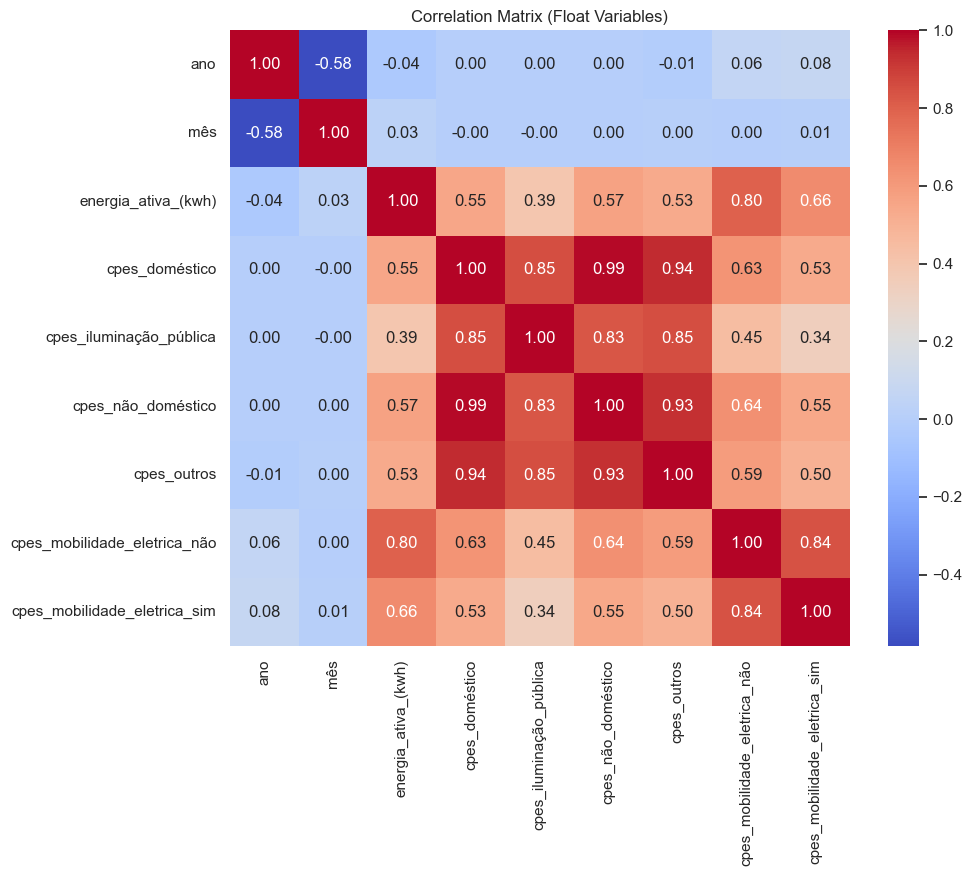

In [59]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Float Variables)')
plt.show()


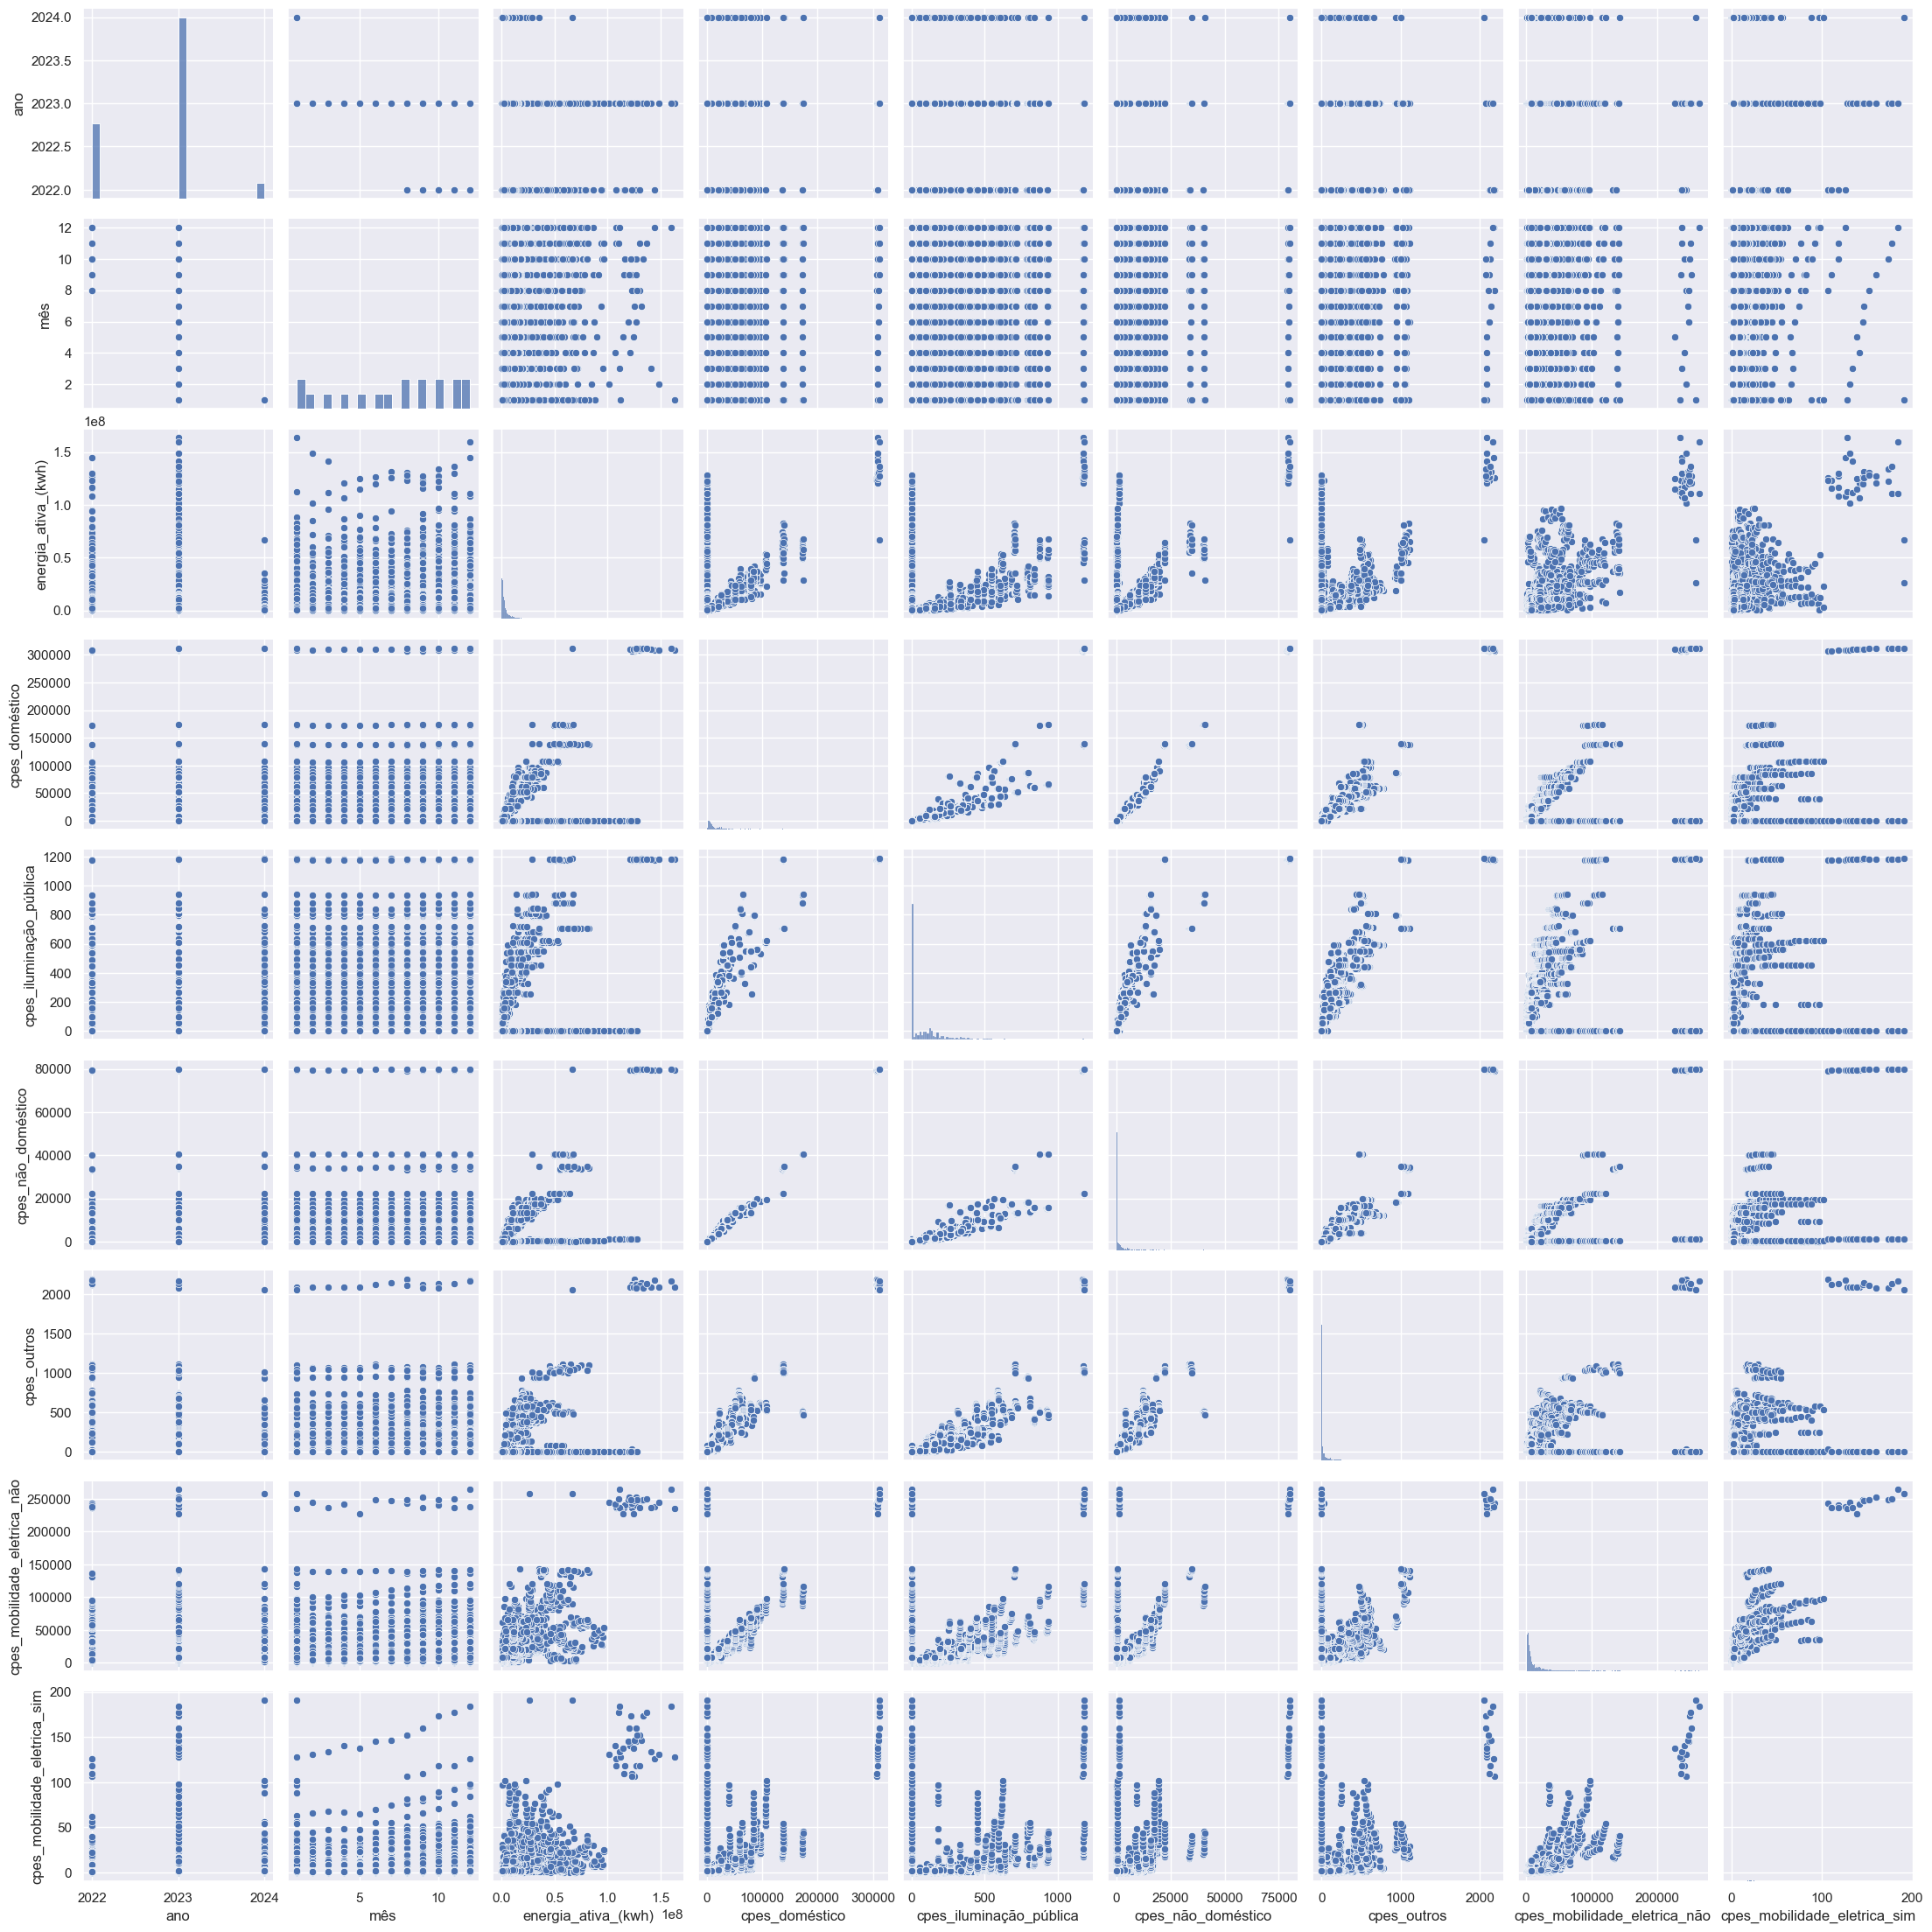

In [60]:
# Pairplot
sns.pairplot(merged_df)
plt.show()

### Procurar por Outliers

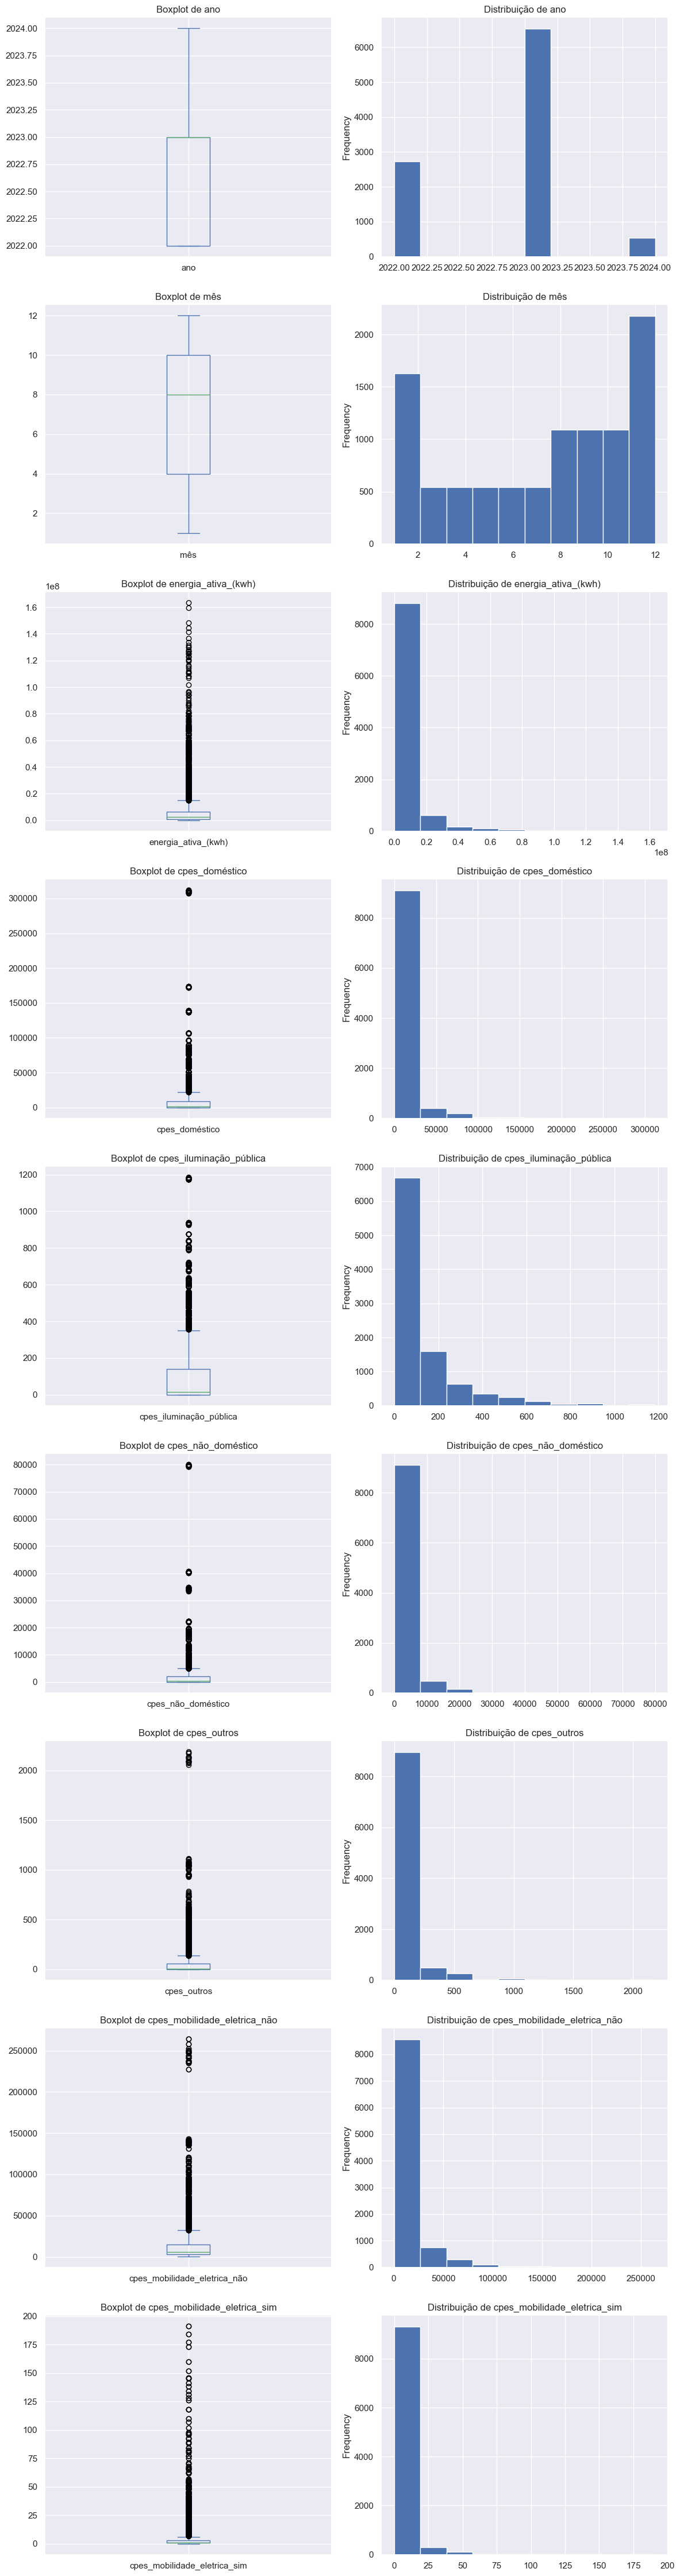

In [61]:
# Boxplots e Histogramas para cada variável numérica
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Criar o subplot para que fique um box e histograma por linha
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(12, len(numeric_columns) * 5))

# Desenhar os boxplots e histogramas
for i, column in enumerate(numeric_columns):
    merged_df[column].plot(kind='box', ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot de {column}')
    
    merged_df[column].plot(kind='hist', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribuição de {column}')

plt.tight_layout()
plt.show()

In [62]:
def find_outliers(f):
    q1 = f.quantile(0.25)
    q3 = f.quantile(0.75)
    iqr = q3 - q1
    return f[(f < (q1 - 1.5 * iqr)) | (f > (q3 + 1.5 * iqr))]

In [63]:
# Procurar outliers
for i, column in enumerate(numeric_columns):
    outliers = find_outliers(merged_df[column])
    print(f"Outliers na coluna '{column}':\n{outliers}\n")


Outliers na coluna 'ano':
Series([], Name: ano, dtype: int64)

Outliers na coluna 'mês':
Series([], Name: mês, dtype: int64)

Outliers na coluna 'energia_ativa_(kwh)':
144     2.509320e+07
145     2.158544e+07
146     1.974517e+07
147     1.689313e+07
148     1.730949e+07
            ...     
9675    1.586383e+07
9677    1.525991e+07
9678    1.788758e+07
9679    1.775922e+07
9680    1.511409e+07
Name: energia_ativa_(kwh), Length: 1081, dtype: float64

Outliers na coluna 'cpes_doméstico':
144     42621.0
145     42624.0
146     42602.0
147     42408.0
148     42448.0
         ...   
9695    26425.0
9696    26432.0
9697    26447.0
9698    26435.0
9699    26444.0
Name: cpes_doméstico, Length: 1167, dtype: float64

Outliers na coluna 'cpes_iluminação_pública':
144     455.0
145     455.0
146     455.0
147     455.0
148     455.0
        ...  
9551    718.0
9552    717.0
9553    718.0
9554    718.0
9555    724.0
Name: cpes_iluminação_pública, Length: 864, dtype: float64

Outliers na coluna 